# 1 Spark Installation

## 1.1 MAC Terminal

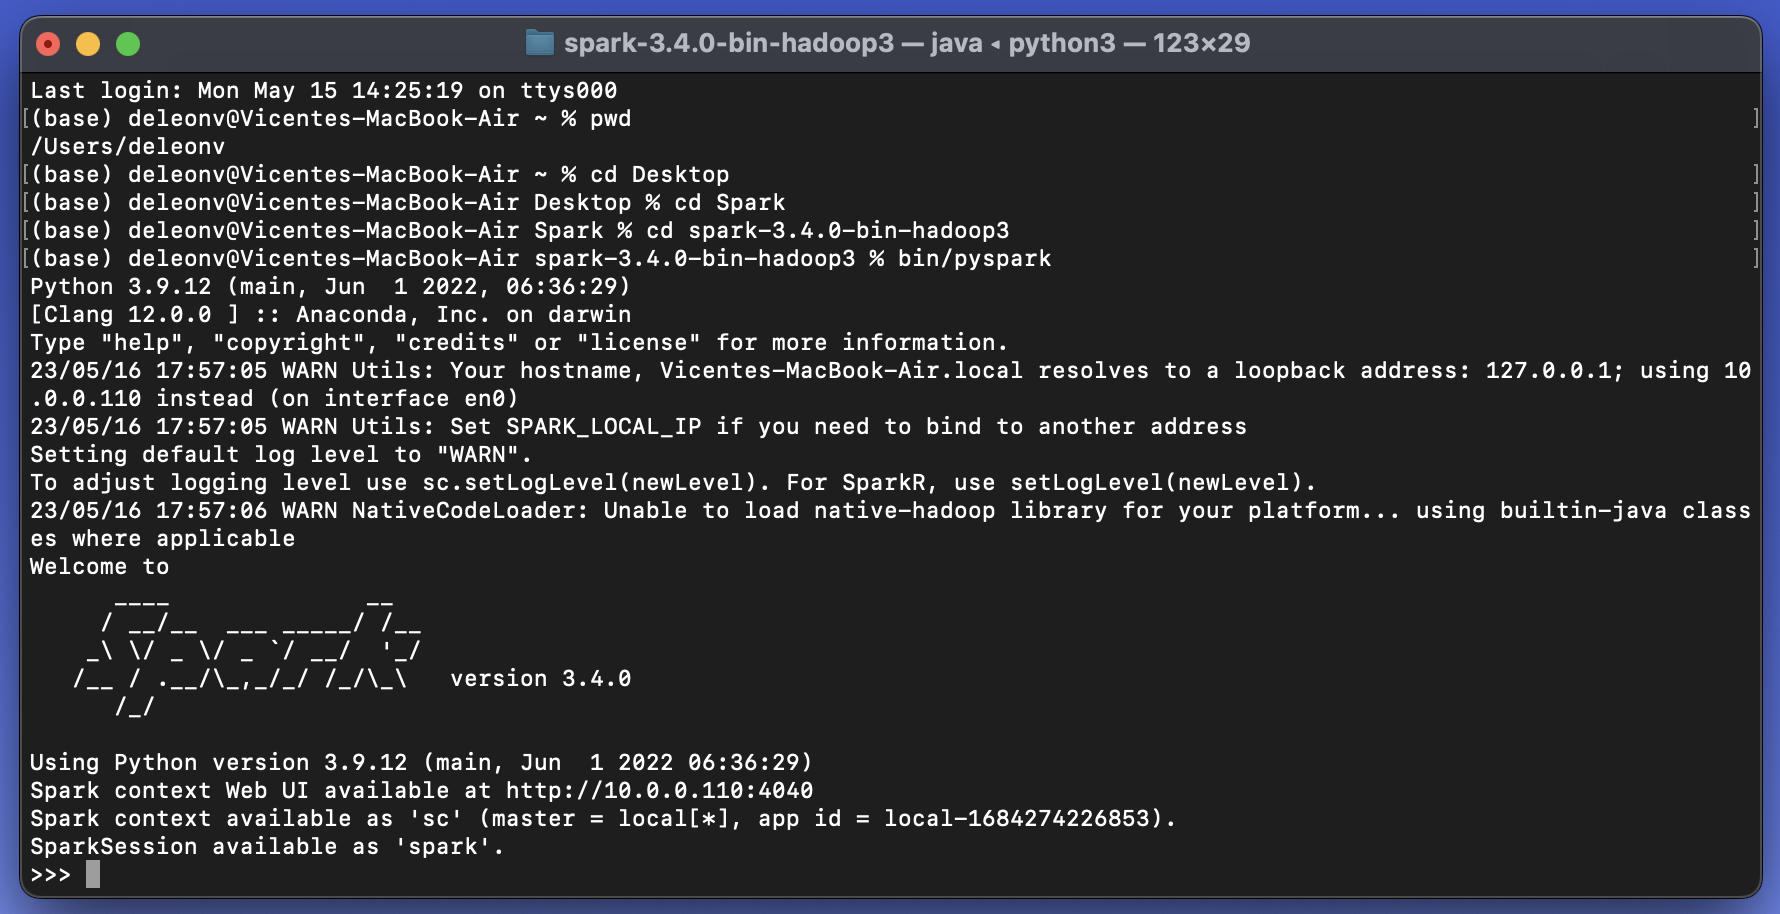

### 1.1.1 Code used for MAC Terminal 

- pwd
- cd Desktop
- cd Spark
- cd spark-3.4.0-bin-hadoop3
- bin/pyspark
- quit()

## 1.2 PySpark + Google Colab Installation:

I really like using Google Colab and after doing a couple of research I came across this link:

https://www.youtube.com/watch?v=Ev_mwYGAbcg

Due to this, I decided to try and to Homework 1 using Google Colab.

In [ ]:
!pip install pyspark py4j

In [2]:
from pyspark.sql import SparkSession

In [3]:
spark = SparkSession.builder.appName('DataFrame').getOrCreate()

In [4]:
# https://stackoverflow.com/questions/69553072/reading-a-xml-file-in-pyspark

spark_xml = SparkSession.builder.appName('ReadXML').getOrCreate()

# 2 Working with Text Files
Reading Text Files: 

This was the best source (youtube link) I came across for text files. It was extremely useful for me:
- https://www.youtube.com/watch?v=9Dpng3bDsPI

- https://www.geeksforgeeks.org/read-text-file-into-pyspark-dataframe/

- https://spark.apache.org/docs/latest/sql-data-sources-text.html

In [73]:
# https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.col.html
# https://spark.apache.org/docs/3.1.2/api/python/reference/api/pyspark.sql.functions.when.html

from pyspark.sql.functions import col
from pyspark.sql.functions import when

In [64]:
df1 = spark.read.option('header', 'true') \
      .option('delimiter', '\t') \
      .option('inferSchema', 'true') \
      .csv('Raisin_Dataset.txt')

In [65]:
# https://sparkbyexamples.com/spark/spark-show-full-column-content-dataframe/

df1.show(n = 5, truncate = False)

+-----+---------------+---------------+------------+----------+-----------+---------+-------+
|Area |MajorAxisLength|MinorAxisLength|Eccentricity|ConvexArea|Extent     |Perimeter|Class  |
+-----+---------------+---------------+------------+----------+-----------+---------+-------+
|87524|442.2460114    |253.291155     |0.819738392 |90546     |0.758650579|1184.04  |Kecimen|
|75166|406.690687     |243.0324363    |0.801805234 |78789     |0.68412957 |1121.786 |Kecimen|
|90856|442.2670483    |266.3283177    |0.798353619 |93717     |0.637612812|1208.575 |Kecimen|
|45928|286.5405586    |208.7600423    |0.684989217 |47336     |0.699599385|844.162  |Kecimen|
|79408|352.1907699    |290.8275329    |0.56401133  |81463     |0.792771926|1073.251 |Kecimen|
+-----+---------------+---------------+------------+----------+-----------+---------+-------+
only showing top 5 rows



Lets print out the schema:

In [66]:
df1.printSchema()

root
 |-- Area: integer (nullable = true)
 |-- MajorAxisLength: double (nullable = true)
 |-- MinorAxisLength: double (nullable = true)
 |-- Eccentricity: double (nullable = true)
 |-- ConvexArea: integer (nullable = true)
 |-- Extent: double (nullable = true)
 |-- Perimeter: double (nullable = true)
 |-- Class: string (nullable = true)



Changing Column Name

In [67]:
new_df1 = df1.withColumnRenamed("Class", "Categorical Class")
new_df1.show(n = 5, truncate=False)

+-----+---------------+---------------+------------+----------+-----------+---------+-----------------+
|Area |MajorAxisLength|MinorAxisLength|Eccentricity|ConvexArea|Extent     |Perimeter|Categorical Class|
+-----+---------------+---------------+------------+----------+-----------+---------+-----------------+
|87524|442.2460114    |253.291155     |0.819738392 |90546     |0.758650579|1184.04  |Kecimen          |
|75166|406.690687     |243.0324363    |0.801805234 |78789     |0.68412957 |1121.786 |Kecimen          |
|90856|442.2670483    |266.3283177    |0.798353619 |93717     |0.637612812|1208.575 |Kecimen          |
|45928|286.5405586    |208.7600423    |0.684989217 |47336     |0.699599385|844.162  |Kecimen          |
|79408|352.1907699    |290.8275329    |0.56401133  |81463     |0.792771926|1073.251 |Kecimen          |
+-----+---------------+---------------+------------+----------+-----------+---------+-----------------+
only showing top 5 rows



In [72]:
new_df1.select(['Categorical Class']).show(n=5)

+-----------------+
|Categorical Class|
+-----------------+
|          Kecimen|
|          Kecimen|
|          Kecimen|
|          Kecimen|
|          Kecimen|
+-----------------+
only showing top 5 rows



Adding Columns

In [74]:
# https://towardsdatascience.com/4-different-ways-of-creating-a-new-column-with-pyspark-1a6782fe764e

final_df = new_df1.withColumn('Numerical Class', when(col('Categorical Class') == 'Kecimen', 1).otherwise(0))

In [80]:
final_df.show(n = 5, truncate = False)

+-----+---------------+---------------+------------+----------+-----------+---------+-----------------+---------------+
|Area |MajorAxisLength|MinorAxisLength|Eccentricity|ConvexArea|Extent     |Perimeter|Categorical Class|Numerical Class|
+-----+---------------+---------------+------------+----------+-----------+---------+-----------------+---------------+
|87524|442.2460114    |253.291155     |0.819738392 |90546     |0.758650579|1184.04  |Kecimen          |1              |
|75166|406.690687     |243.0324363    |0.801805234 |78789     |0.68412957 |1121.786 |Kecimen          |1              |
|90856|442.2670483    |266.3283177    |0.798353619 |93717     |0.637612812|1208.575 |Kecimen          |1              |
|45928|286.5405586    |208.7600423    |0.684989217 |47336     |0.699599385|844.162  |Kecimen          |1              |
|79408|352.1907699    |290.8275329    |0.56401133  |81463     |0.792771926|1073.251 |Kecimen          |1              |
+-----+---------------+---------------+-

In [84]:
# https://sparkbyexamples.com/pyspark/pyspark-select-distinct/

KvsB = final_df.select('Categorical Class', 'Numerical Class').distinct()
KvsB.show()

+-----------------+---------------+
|Categorical Class|Numerical Class|
+-----------------+---------------+
|          Kecimen|              1|
|            Besni|              0|
+-----------------+---------------+



# 3 Working with Json Files

- https://www.youtube.com/watch?v=6XdXHgFMgf4

In [133]:
df2 = spark.read.json('quize.json')
df2.show(truncate = False)

+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|quiz                                                                                                                                                                                                      |
+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|{{{12, [10, 11, 12, 13], 5 + 7 = ?}, {4, [1, 2, 3, 4], 12 - 8 = ?}}, {{Huston Rocket, [New York Bulls, Los Angeles Kings, Golden State Warriros, Huston Rocket], Which one is correct team name in NBA?}}}|
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [134]:
df2.printSchema()

root
 |-- quiz: struct (nullable = true)
 |    |-- maths: struct (nullable = true)
 |    |    |-- q1: struct (nullable = true)
 |    |    |    |-- answer: string (nullable = true)
 |    |    |    |-- options: array (nullable = true)
 |    |    |    |    |-- element: string (containsNull = true)
 |    |    |    |-- question: string (nullable = true)
 |    |    |-- q2: struct (nullable = true)
 |    |    |    |-- answer: string (nullable = true)
 |    |    |    |-- options: array (nullable = true)
 |    |    |    |    |-- element: string (containsNull = true)
 |    |    |    |-- question: string (nullable = true)
 |    |-- sport: struct (nullable = true)
 |    |    |-- q1: struct (nullable = true)
 |    |    |    |-- answer: string (nullable = true)
 |    |    |    |-- options: array (nullable = true)
 |    |    |    |    |-- element: string (containsNull = true)
 |    |    |    |-- question: string (nullable = true)



# 4 Working with XML Files


Working with XML was the hardest task in this homework for me. Since I wanted to use Google Colab to read files using PySpark, I ended up facing many issues for question 4.

I tried downloading databricks API many times, but it ended up failing multiple times. Due to this I managed to run this question using my MAC Terminal. The images and codes below will provide each step I took in order to succesfully run this task.

Important: I will try to submit all other suplemental material into Canvas.

## 4.1 Google Chrome XML Viewer

I noticed there was something wrong when I tried to open the XML File. I've never worked with xml before, so I decided to open it and noticed that it had an odd formatting. During office hours, the TA kindly helped me getting through the json file structure and we saw it had an odd formatting. I decided to go ahead and used Google Chrome XML Viewer to properly view the "datasets.xml" file.

https://www.freecodecamp.org/news/how-to-open-an-xml-file/#:~:text=If%20you%20want%20to%20open,the%20%22Open%20With%22%20option.

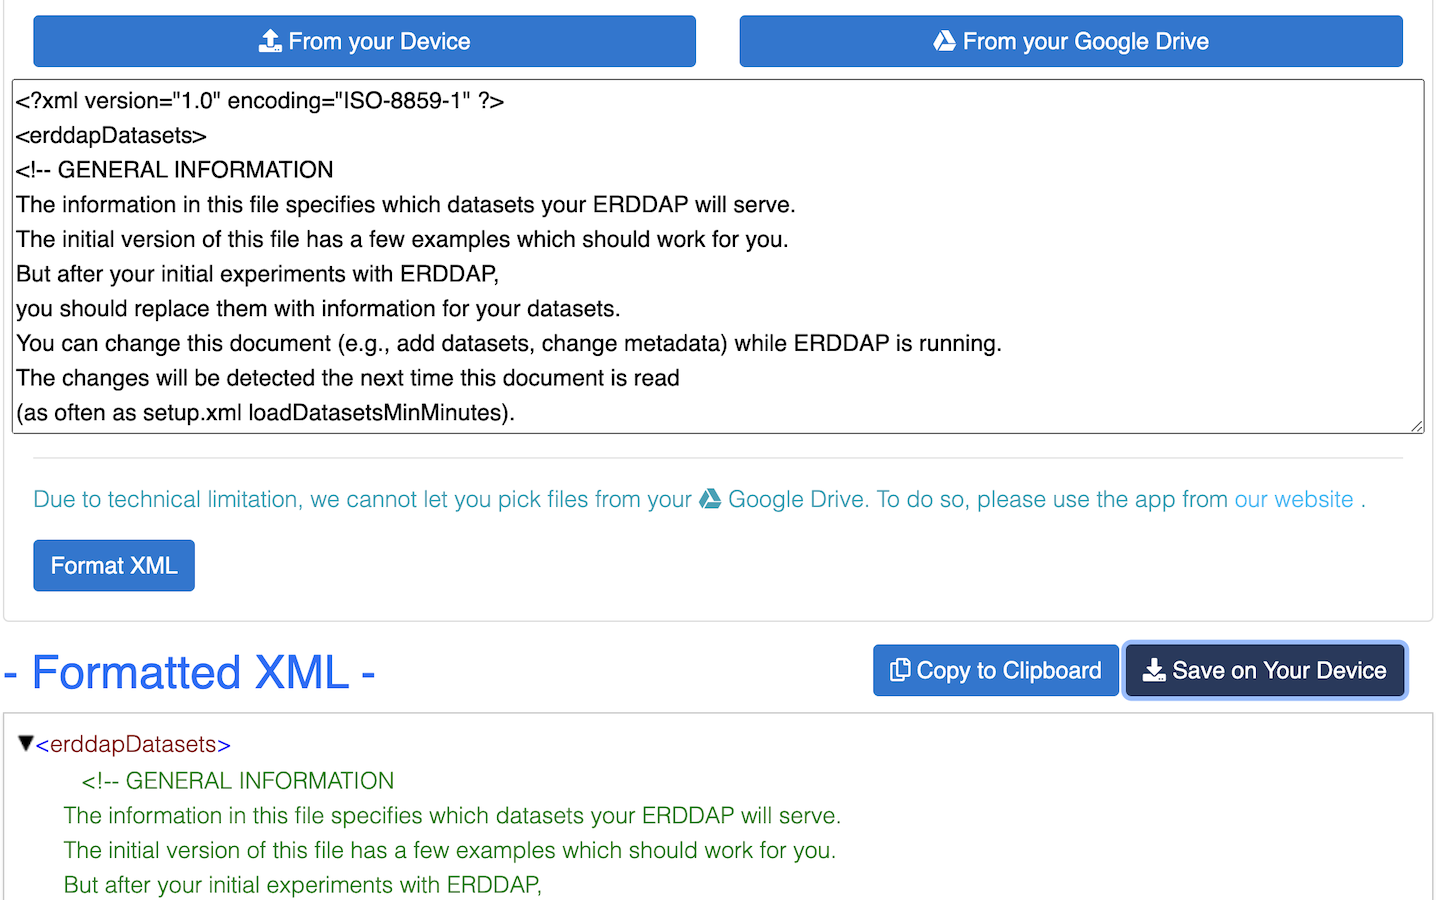

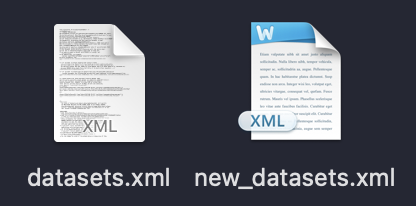

## 4.2 Using MAC Terminal to read XML File

https://medium.com/analytics-vidhya/xml-parsing-with-pyspark-4a16fbd53ddb

Running: 


- bin/pyspark --packages com.databricks:spark-xml_2.12:0.12.0 (this will match my Spark version I initialy downloaded into my MAC)

- Databricks: https://mvnrepository.com/artifact/com.databricks/spark-xml_2.12/0.12.0

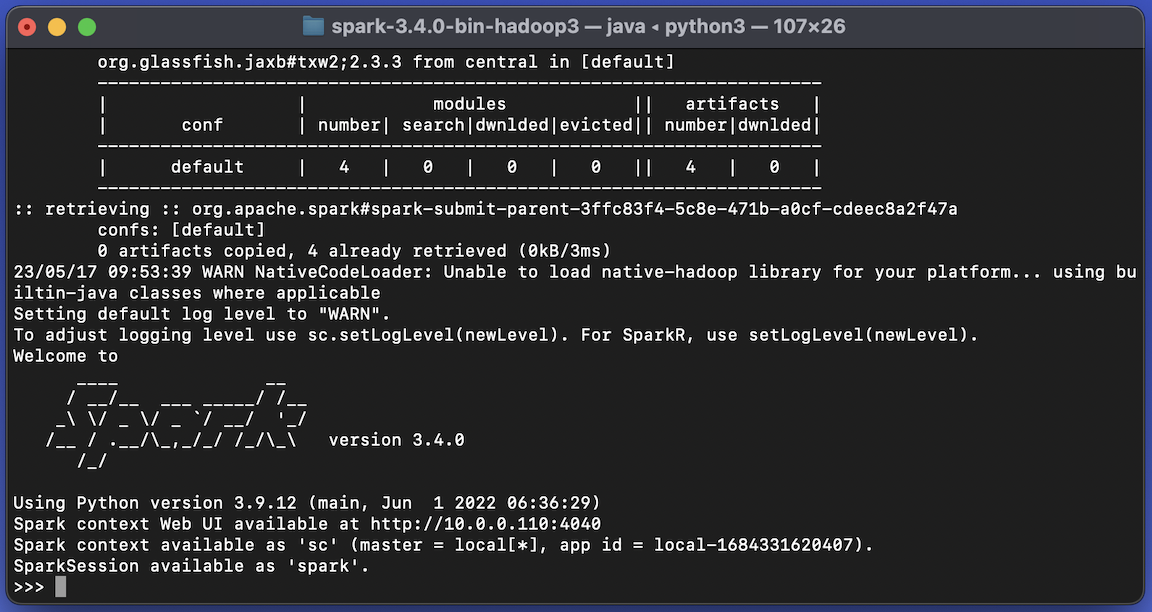


Running:

- spark_xml = SparkSession.builder.appName('ReadXML').getOrCreate()

- df3= spark_xml.read.format('xml').option('rowTag', 'dataset').load('/Users/deleonv/Desktop/Spark/HW1/new_datasets.xml')
df3.printSchema()

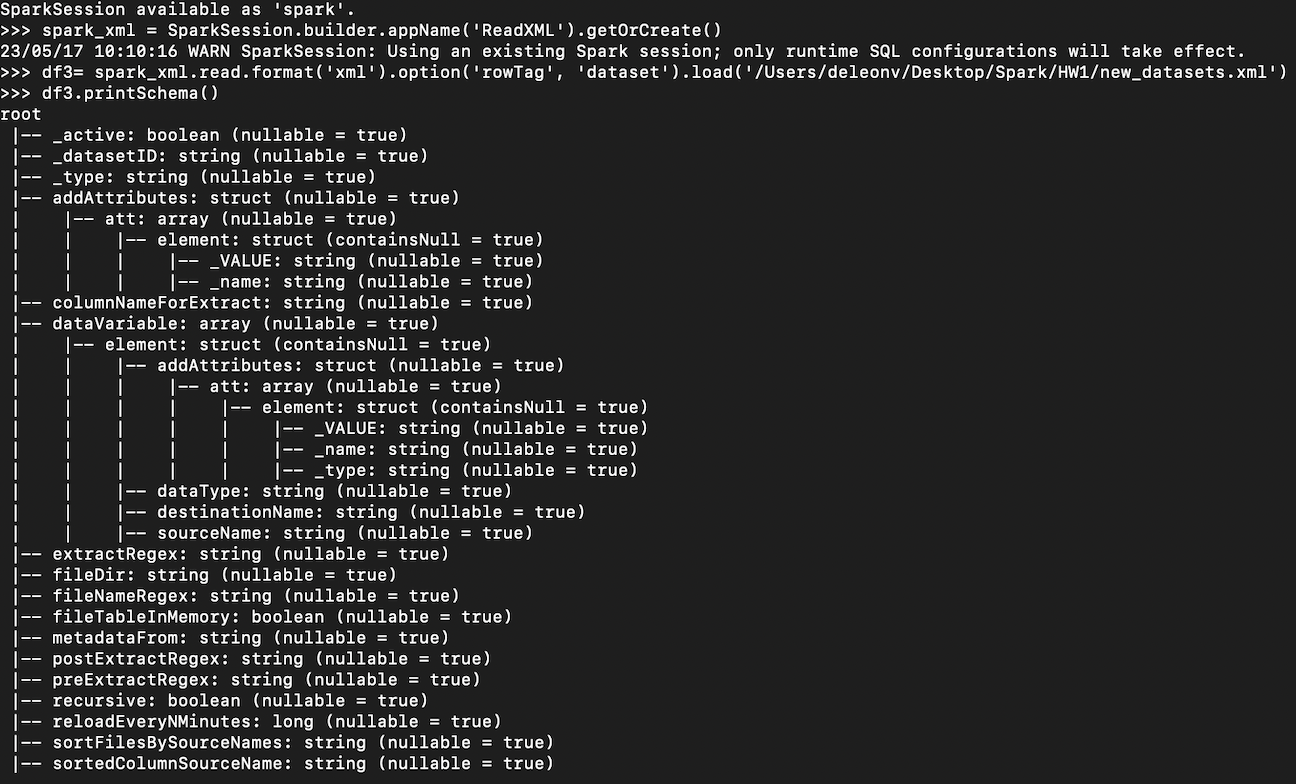

Running:

- df3.show(truncate=False)

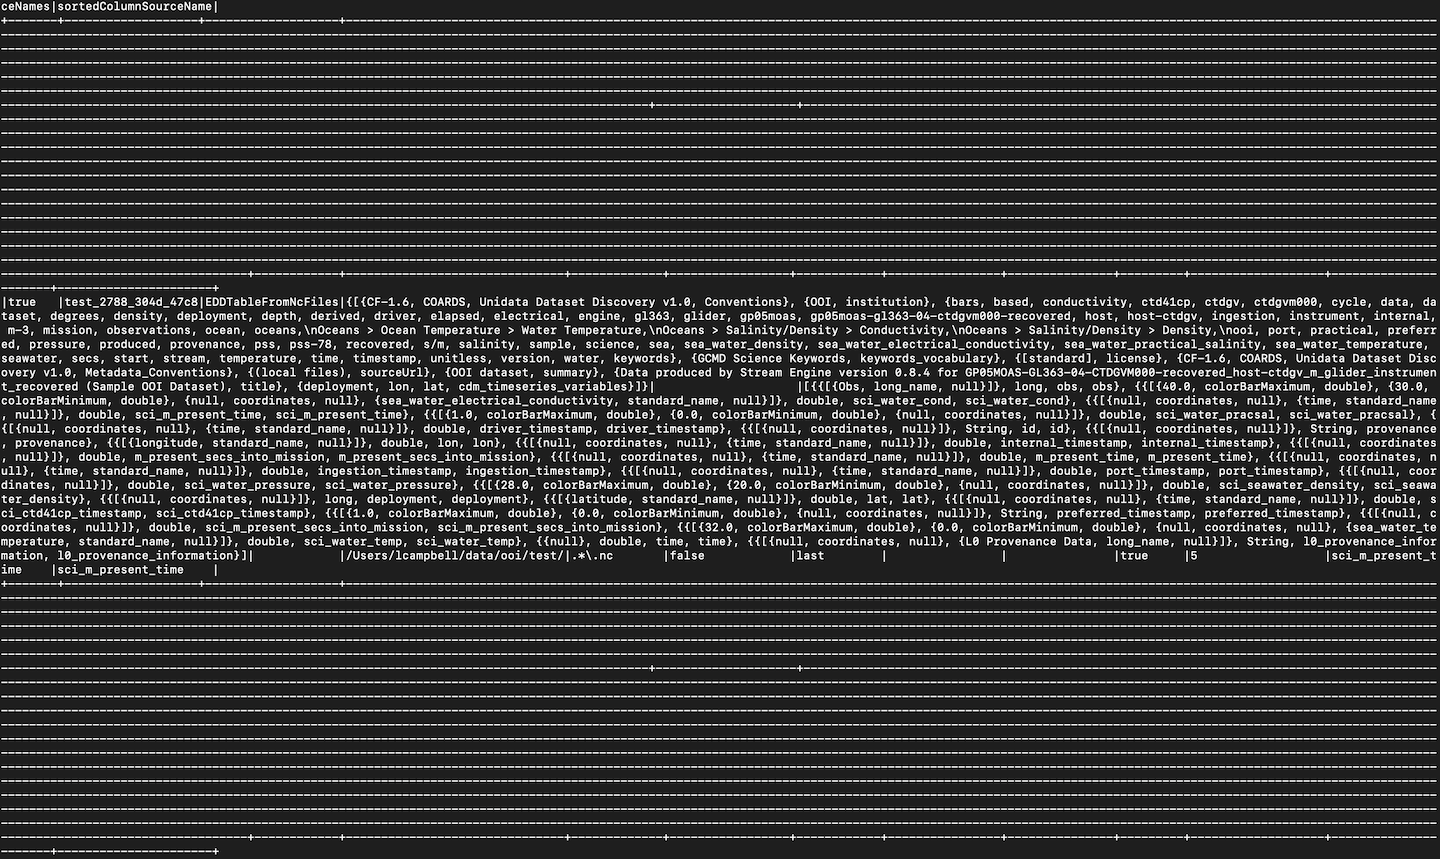

# 5 Working with CSV Files

In [111]:
df4 = spark.read.option('header', 'true').csv('/content/Social_Network_Ads.csv')

In [112]:
df4.printSchema()

root
 |-- User ID: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- EstimatedSalary: string (nullable = true)
 |-- Purchased: string (nullable = true)



Print 10 rows

In [115]:
df4.show(n = 10, truncate = False)

+--------+------+---+---------------+---------+
|User ID |Gender|Age|EstimatedSalary|Purchased|
+--------+------+---+---------------+---------+
|15624510|Male  |19 |19000          |0        |
|15810944|Male  |35 |20000          |0        |
|15668575|Female|26 |43000          |0        |
|15603246|Female|27 |57000          |0        |
|15804002|Male  |19 |76000          |0        |
|15728773|Male  |27 |58000          |0        |
|15598044|Female|27 |84000          |0        |
|15694829|Female|32 |150000         |1        |
|15600575|Male  |25 |33000          |0        |
|15727311|Female|35 |65000          |0        |
+--------+------+---+---------------+---------+
only showing top 10 rows



Select Columns 2 and 3 (Gender and Age respectively) and print them

In [117]:
df4.select('Gender', 'Age').show()

+------+---+
|Gender|Age|
+------+---+
|  Male| 19|
|  Male| 35|
|Female| 26|
|Female| 27|
|  Male| 19|
|  Male| 27|
|Female| 27|
|Female| 32|
|  Male| 25|
|Female| 35|
|Female| 26|
|Female| 26|
|  Male| 20|
|  Male| 32|
|  Male| 18|
|  Male| 29|
|  Male| 47|
|  Male| 45|
|  Male| 46|
|Female| 48|
+------+---+
only showing top 20 rows



Rename the column "EstimatedSalary" to "Annual Salary" and "Purchased" to "Score".

In [121]:
new_df4 = df4.withColumnRenamed('EstimatedSalary', 'Annual Salary')
new_df4 = new_df4.withColumnRenamed('Purchased', 'Score')

new_df4.show(n = 10, truncate=False)

+--------+------+---+-------------+-----+
|User ID |Gender|Age|Annual Salary|Score|
+--------+------+---+-------------+-----+
|15624510|Male  |19 |19000        |0    |
|15810944|Male  |35 |20000        |0    |
|15668575|Female|26 |43000        |0    |
|15603246|Female|27 |57000        |0    |
|15804002|Male  |19 |76000        |0    |
|15728773|Male  |27 |58000        |0    |
|15598044|Female|27 |84000        |0    |
|15694829|Female|32 |150000       |1    |
|15600575|Male  |25 |33000        |0    |
|15727311|Female|35 |65000        |0    |
+--------+------+---+-------------+-----+
only showing top 10 rows

